# Calculating Quantities

There are various built-in functions to calculate quantities, not limited to:

- {func}`~quimb.calc.fidelity`
- {func}`~quimb.calc.purify`
- {func}`~quimb.calc.dephase`
- {func}`~quimb.calc.kraus_op`
- {func}`~quimb.calc.projector`
- {func}`~quimb.calc.measure`
- {func}`~quimb.calc.cprint`
- {func}`~quimb.calc.entropy`
- {func}`~quimb.calc.mutinf`
- {func}`~quimb.calc.mutinf_subsys`
- {func}`~quimb.calc.schmidt_gap`
- {func}`~quimb.calc.tr_sqrt`
- {func}`~quimb.calc.partial_transpose`
- {func}`~quimb.calc.logneg`
- {func}`~quimb.calc.logneg_subsys`
- {func}`~quimb.calc.negativity`
- {func}`~quimb.calc.concurrence`
- {func}`~quimb.calc.one_way_classical_information`
- {func}`~quimb.calc.quantum_discord`
- {func}`~quimb.calc.trace_distance`
- {func}`~quimb.calc.decomp`
- {func}`~quimb.calc.correlation`
- {func}`~quimb.calc.pauli_correlations`
- {func}`~quimb.calc.ent_cross_matrix`
- {func}`~quimb.calc.is_degenerate`
- {func}`~quimb.calc.is_eigenvector`
- {func}`~quimb.calc.page_entropy`
- {func}`~quimb.calc.heisenberg_energy`

## Approximate Spectral Functions

The module {py:mod}`~quimb.linalg.approx_spectral`, contains a Lanczos method for estimating any quantities of the form `tr(fn(A))`. Where `A` is any operator that implements a dot product with a vector. For example, estimating the trace of the sqrt of a matrix would naievly require diagonalising it:

In [1]:
import quimb as qu

rho = qu.rand_rho(2**12)
rho_el = qu.eigvalsh(rho)
sum(rho_el**0.5)

54.32566715771646

In [2]:
qu.tr_sqrt_approx(rho)

54.45773513531054

Diagonalization has a cost of `O(n^3)`, which is essentially reduced
to `O(k * n^2)` for this stochastic method. For a general function
{func}`~quimb.linalg.approx_spectral.approx_spectral_function` can be used.

However, the real advantage occurs when the full matrix does not need to be fully represented, e.g. in the case of 'partial trace states'. One can then calculate quantities for subsystems that would not be possible to explicitly represent.

For example, the partial trace, followed by partial transpose, followed by vector multiplication can be 'lazily' evaluated as a tensor contraction (see {py:func}`~quimb.linalg.approx_spectral.lazy_ptr_ppt_dot`). In this way the logarithmic negativity of subsytems can be efficiently calculated:

In [3]:
psi = qu.rand_ket(2**20)
dims = [2**8, 2**4, 2**8]
qu.logneg_subsys_approx(psi, dims, sysa=0, sysb=2)

5.7437225898123465

To inspect the process you can supply an `info` dict, and optionally also have the trials plotted like so:

1.217(12)e+11:  40%|############################4                                          | 411/1024 [00:34<00:50, 12.03it/s]


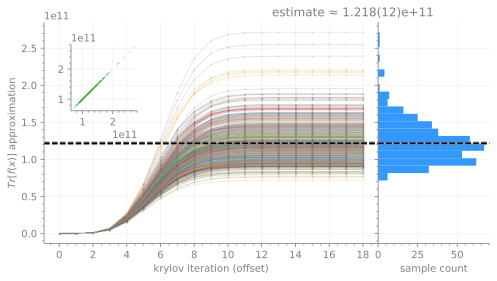

In [4]:
%config InlineBackend.figure_formats = ['svg']

# estimate a 2D partition function
beta = 2.0
H = qu.ham_heis_2D(4, 4, bz=1.7, sparse=True)

# if plot=False, the desired keys should be filled before supplying info
info = {}

Z = qu.approx_spectral_function(
    H,
    f=lambda x: qu.exp(-beta * x),
    tol=1e-2,
    info=info,
    progbar=True,
    plot=True,
)

In [5]:
info.keys()

dict_keys(['estimate', 'error', 'samples', 'estimates_raw', 'estimates_window', 'estimates_fit', 'estimates', 'fig', 'axs'])